# Dengue Disease Detection


In [14]:
import pandas as pd
import seaborn as sns
#ignoring feature warnings
import warnings
warnings.filterwarnings('ignore')

## Reading data

In [15]:
data=pd.read_csv("C:/Users/tejak/Desktop/Project@ML/github/code/dataset.csv")

## Printing top 5 rows

In [16]:
data.head()

,id,fever,vomiting,nausea,vomiting_blood,body_pains,pain_behind_eyes,joint_pains,chill,headache,swollen_glands,rashes,abdominal_pain,ble_nose,ble_mouth,fatigue,red_eyes,platelets_count,dengue
0,1,102.5,no,no,no,yes,no,no,yes,low,no,yes,no,no,no,yes,no,290000,no
1,2,101.8,no,no,no,low,no,no,no,low,no,no,no,no,no,no,no,256000,no
2,3,101.8,yes,no,no,low,no,no,yes,high,no,no,no,no,no,yes,yes,165000,no
3,4,100.9,no,no,no,yes,no,no,yes,high,no,yes,no,yes,no,yes,no,168000,no
4,5,103.4,yes,yes,yes,high,yes,medium,yes,medium,yes,no,yes,yes,no,yes,no,6800,yes


In [17]:
data.drop(columns={'id'},inplace=True) #Deleting id

In [18]:
get={'no':0,'yes':1,'low':2,'medium':3,'high':4} 


In [19]:
data.columns

Index(['fever', 'vomiting', 'nausea', 'vomiting_blood', 'body_pains',
       'pain_behind_eyes', 'joint_pains', 'chill', 'headache',
       'swollen_glands', 'rashes', 'abdominal_pain', 'ble_nose', 'ble_mouth',
       'fatigue', 'red_eyes', 'platelets_count', 'dengue'],
      dtype='object')

## Data cleaning

In [20]:
data.vomiting=data.vomiting.map(get)
data.nausea=data.nausea.map(get)
data.vomiting_blood=data.vomiting_blood.map(get)
data.body_pains=data.body_pains.map(get)
data.pain_behind_eyes=data.pain_behind_eyes.map(get)
data.joint_pains=data.joint_pains.map(get)
data.chill=data.chill.map(get)
data.headache=data.headache.map(get)
data.swollen_glands=data.swollen_glands.map(get)
data.rashes=data.rashes.map(get)
data.abdominal_pain=data.abdominal_pain.map(get)
data.ble_nose=data.ble_nose.map(get)
data.ble_mouth=data.ble_mouth.map(get)
data.fatigue=data.fatigue.map(get)
data.red_eyes=data.red_eyes.map(get)
data.dengue=data.dengue.map(get)

In [21]:
data=data[:225]

In [22]:
data.head()

,fever,vomiting,nausea,vomiting_blood,body_pains,pain_behind_eyes,joint_pains,chill,headache,swollen_glands,rashes,abdominal_pain,ble_nose,ble_mouth,fatigue,red_eyes,platelets_count,dengue
0,102.5,0,0,0,1,0,0,1,2,0,1,0,0,0,1,0,290000,0
1,101.8,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,256000,0
2,101.8,1,0,0,2,0,0,1,4,0,0,0,0,0,1,1,165000,0
3,100.9,0,0,0,1,0,0,1,4,0,1,0,1,0,1,0,168000,0
4,103.4,1,1,1,4,1,3,1,3,1,0,1,1,0,1,0,6800,1


In [23]:

data_n = data[data['dengue'] == 0]
data_y = data[data['dengue'] == 1]

c=0
for i in data.dengue:
    if i==1:
        c=c+1
score=c/data.shape[0]
print('the bechmark model accuarcy score  {}%'.format(score*100))

the bechmark model accuarcy score  35.714285714285715%


## Data visualization

In [24]:
import matplotlib.pyplot as plt

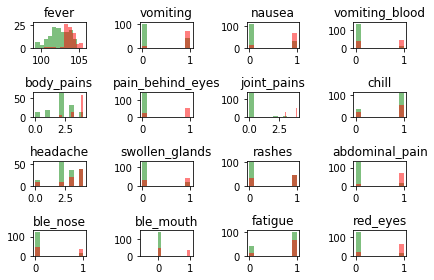

In [25]:

# Instantiate figure object
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(data.columns[0:16])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(4,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(data_n[b], label = 'Negative', stacked = True, alpha=0.5, color= 'g')
    ax.hist(data_y[b], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)



plt.tight_layout()
#plt.legend()
plt.show()   

## Heat map generation

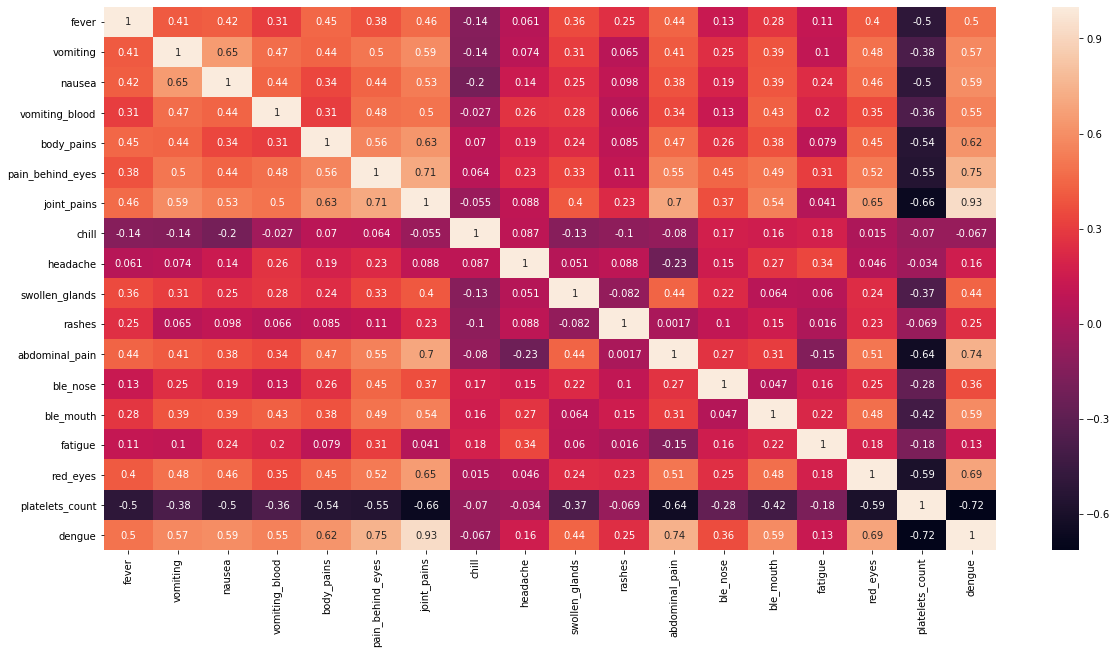

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)


## Data Modeling

In [27]:
## to split the data into ratio of 75% and 25% to train model and test the model

from sklearn.model_selection import train_test_split

new_data=data.drop(columns={'dengue'})
X_train,X_test,y_train,y_test=train_test_split(new_data,data['dengue'],random_state=7)

In [28]:
#The data is preprocessing using sklearn.preprocessing.Normalizer
from sklearn.preprocessing import Normalizer

norm=Normalizer()
X_train_normal=norm.transform(X_train)
X_test_normal=norm.transform(X_test)
#print(X_test_normal)

### Hyperparameter tuning

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


RF_params = {'n_estimators':[10,50,100]}
DTC_params = {'criterion':['entropy'], 'max_depth':[10, 50, 100]}
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}

In [30]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
models=[]

models.append(('DTC', DecisionTreeClassifier(), DTC_params))

models.append(('LR', LogisticRegression(), LR_params))

In [31]:
from tqdm import tqdm
results=[]
names=[]
scoring='accuracy' 
for name, model, params in tqdm(models):
    kfold = KFold(len(X_train_normal), random_state=7, shuffle=True)
    model_grid = GridSearchCV(model, params)
    cv_results = cross_val_score(model_grid, X_train_normal, y_train, cv = kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "Cross Validation Accuracy %s: Accarcy: %f SD: %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

  0%|          | 0/2 [00:00<?, ?it/s]

Cross Validation Accuracy DTC: Accarcy: 1.000000 SD: 0.000000


 50%|█████     | 1/2 [00:02<00:02,  2.73s/it]

Cross Validation Accuracy LR: Accarcy: 0.642857 SD: 0.479157


100%|██████████| 2/2 [00:07<00:00,  3.34s/it]


### White Grid Plot

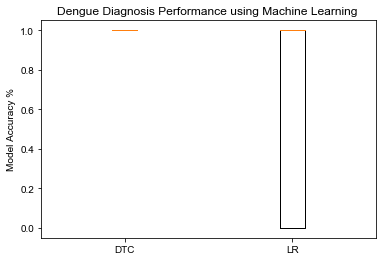

In [32]:
plt.boxplot(results, labels = names)
plt.title('Dengue Diagnosis Performance using Machine Learning ')
plt.ylabel('Model Accuracy %')
sns.set_style("whitegrid")
plt.show()

### Accuracy

In [33]:
#The accuracy score obtained without using GridSearchCV

from sklearn.metrics import make_scorer, accuracy_score, fbeta_score

clf=RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_normal,y_train)
pred=clf.predict(X_test_normal)
accuracy_score(pred,y_test)

0.9821428571428571

### Data metric evaluation

In [34]:
from sklearn.metrics import make_scorer, accuracy_score, fbeta_score

clf = DecisionTreeClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune
parameters = {'criterion':['entropy'], 'max_depth':[10, 50, 100]}

# TODO: Make an fbeta_score scoring object


# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf,parameters,scoring='accuracy')

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train_normal,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train_normal, y_train)).predict(X_test_normal)
best_predictions = best_clf.predict(X_test_normal)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.9821
F-score on testing data: 0.9615

Optimized Model
------
Final accuracy score on the testing data: 0.9821
Final F-score on the testing data: 0.9615


###  Confusion Matrix and Classification report

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

matrix=confusion_matrix(pred,y_test)
matrix=pd.DataFrame(matrix,columns=['Predicted Negative','Predicted Postive'],index=['Actual Negative','Actual Positive'])
print(matrix)

                 Predicted Negative  Predicted Postive
Actual Negative                  35                  0
Actual Positive                   1                 20


In [36]:
from sklearn.metrics import classification_report

print(classification_report(best_predictions,y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.95      0.98        21

    accuracy                           0.98        56
   macro avg       0.99      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56



###  Performing Predictions

In [37]:
#Predicting Function
def Predict(fever, vomiting, nausea, vomiting_blood, body_pains, pain_behind_eyes, joint_pains, chill, headache, swollen_glands, rashes, abdominal_pain, ble_nose, ble_mouth, fatigue, red_eyes, platelets_count):
    normilized_value = norm.transform([[fever, vomiting, nausea, vomiting_blood, body_pains, pain_behind_eyes, joint_pains, chill, headache, swollen_glands, rashes, abdominal_pain, ble_nose, ble_mouth, fatigue, red_eyes, platelets_count]]);
    element = str(normilized_value[[0]])
    element = element.strip('[').strip(']').split()
    prediction_result=best_clf.predict([element])
    if prediction_result == [1]:
        return True
    elif prediction_result == [0]:
        return False
    else:
        return "Unknown"
    

In [38]:
data.head()

,fever,vomiting,nausea,vomiting_blood,body_pains,pain_behind_eyes,joint_pains,chill,headache,swollen_glands,rashes,abdominal_pain,ble_nose,ble_mouth,fatigue,red_eyes,platelets_count,dengue
0,102.5,0,0,0,1,0,0,1,2,0,1,0,0,0,1,0,290000,0
1,101.8,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,256000,0
2,101.8,1,0,0,2,0,0,1,4,0,0,0,0,0,1,1,165000,0
3,100.9,0,0,0,1,0,0,1,4,0,1,0,1,0,1,0,168000,0
4,103.4,1,1,1,4,1,3,1,3,1,0,1,1,0,1,0,6800,1


In [39]:
#prediction function calling
#Enter the values in the sequence fever, vomiting, nausea, vomiting_blood, body_pains, pain_behind_eyes, joint_pains, chill, headache, swollen_glands, rashes, abdominal_pain, ble_nose, ble_mouth, fatigue, red_eyes, platelets_count

In [40]:
Predict(102.5,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,290000)

False

In [41]:
Predict(100,1,0,1,2,1,0,1,1,1,0,1,1,0,1,0,17000)

True